In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import numpy as np
import os
from matplotlib import pyplot as plt
import matplotlib as mpl
from time import time

%matplotlib inline
np.seterr(all='warn')
textwidth = 6.268
mpl.rcParams['figure.dpi'] = 70
default_figargs = dict(figsize = (textwidth,textwidth))

import logging
mpl_logger = logging.getLogger('matplotlib')
mpl_logger.setLevel(logging.WARNING) 

In [3]:
from operator import mul
from functools import reduce
def product(iterable): return reduce(mul, iterable)

from munch import Munch

In [4]:
from import_funcs import get_data_structured

fpath = Path('/data/users/tch14/slurm_runs/101765')

obs = get_data_structured(fpath,
                         requested_observables = ['Fc', 'Ff', 'IPRs', 'Mf_moments', 'Nc', 'Nf', 'accept_rates', 'classical_accept_rates', 'eigenval_bins', 'eigenvals', 'last_state', 'proposal_rates', 'state', 'time'],
                         MCMC_slice = slice(None, None, 5),
                          structure_names = ('repeats','Js','Ts'),
                         )

import pickle 
with open(fpath/'data.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(obs, f, pickle.HIGHEST_PROTOCOL)

looking in /data/users/tch14/slurm_runs/101765
NO DATA FILES FOUND


In [6]:
from FKMC.import_funcs import get_data_structured

fpath = Path('/data/users/tch14/slurm_runs/117969')

obs = get_data_structured(fpath,
                         requested_observables = ['Mf_moments',],
                         MCMC_slice = slice(None, None, 1),
                          structure_names = ('repeats','Js','Ts'),
                         )
'''
import pickle 
with open(fpath/'data2.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(obs, f, pickle.HIGHEST_PROTOCOL)
'''

CRITICAL:FKMC.import_funcs:looking in /data/users/tch14/slurm_runs/117969
INFO:FKMC.import_funcs:job ids range from 0 to 899
INFO:FKMC.import_funcs:structure_names = ('repeats', 'Js', 'Ts')
INFO:FKMC.import_funcs:structure_dims = (array(1), 30, 30)
INFO:FKMC.import_funcs:Expected number of jobs 900
INFO:FKMC.import_funcs:Logger keys: ['total_jobs', 'Js', 'Ts', 'Ns', 'repeats', 'structure_names', 'parameters', 'MCMC_params', 'logs', 'desc'] 

INFO:FKMC.import_funcs:MCMC_params: Munch({'state': None, 'N_steps': 100000, 'N_burn_in': 10000, 'thin': 100, 'logger': <FKMC.montecarlo.Eigenspectrum_IPR_all object at 0x7fcc34831390>, 'proposal': <function p_multi_site_uniform_reflect at 0x7fcc352341e0>, 'accept_function': <function perturbation_accept at 0x7fcc35234510>, 'warnings': True}) 

INFO:FKMC.import_funcs:MCMC Steps: 100000 with thinning = 100 for 1000 recorded steps
INFO:FKMC.import_funcs:Slicing this with MCMC_slice = slice(None, None, 1)

INFO:FKMC.import_funcs:[(0, 'repeats', array(

"\nimport pickle \nwith open(fpath/'data2.pickle', 'wb') as f:\n    # Pickle the 'data' dictionary using the highest protocol available.\n    pickle.dump(obs, f, pickle.HIGHEST_PROTOCOL)\n"

In [21]:
import pickle
fpath = Path('/data/users/tch14/slurm_runs/101765')
with open(fpath/'data.pickle', 'rb') as f:
    obs = pickle.load(f)
print(obs)

None


In [15]:
obs.time_shapehint

AttributeError: 'NoneType' object has no attribute 'time_shapehint'

(array([1140.,  252.,  648.,  906.,  780.,  672.,  360.,   18.,    6.,
          18.]),
 array([0.08150498, 0.48541532, 0.88932567, 1.29323601, 1.69714636,
        2.1010567 , 2.50496704, 2.90887739, 3.31278773, 3.71669808,
        4.12060842]),
 <a list of 10 Patch objects>)

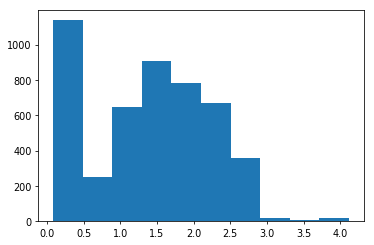

In [13]:
plt.hist(obs.time.flatten() /60/60)

In [5]:
obs.parameters

{'t': 1,
 'alpha': 1.5,
 'mu': 0,
 'beta': 1000.0,
 'J': 0.001,
 'U': 5,
 'normalise': True,
 'J_matrix': '...'}

## Pad out the data to the full length even if the jobs havent all finished and also reshape to 2D from 1D

In [8]:
def fill_and_reshape(sparse):
    dense = np.full(shape = (6, len(obs.Js) * len(obs.Ts)), fill_value = np.nan)
    dense[:, :sparse.shape[1]] = sparse
    return dense.reshape(6, len(obs.Js), len(obs.Ts))

#t = fill_and_reshape(obs.time)
#M2 = fill_and_reshape(obs.Mf_moments[:, :, 2].mean(axis=-1))
#M4 = fill_and_reshape(obs.Mf_moments[:, :, 4].mean(axis=-1))

AttributeError: 'NoneType' object has no attribute 'time'

AttributeError: 'NoneType' object has no attribute 'time'

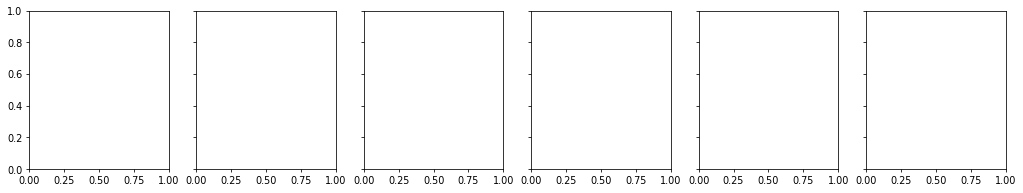

In [12]:
from matplotlib import colors
from itertools import count

norm = colors.Normalize()
f, axes = plt.subplots(1,6, figsize = (6*3,3), sharey = 'row')

#obs.time_shapehint ('Ns', 'repeats', 'Js', 'Ts')
t = obs.time.mean(axis = 1)

for i, N, ax in zip(count(), obs.Ns, axes):
    ax.set(title = f'N = {N}')
    cs = ax.pcolormesh(obs.Ts, obs.Js, t[i].T/60**2, cmap='RdBu_r', norm = norm)

f.colorbar(cs)
f.suptitle("Run times for each job")
f.tight_layout()

## Order Parameter

In [19]:
obs.Mf_moments_shapehint

('Ns', 'repeats', 'Js', 'Ts', 'moment', 'MCstep')

In [24]:
M2 = obs.Mf_moments[:, :, :, :, 2].mean(axis = (1,-1))
M2 = np.einsum('ijk -> ikj', M2)

M4 = obs.Mf_moments[:, :, :, :, 4].mean(axis = (1,-1))
M4 = np.einsum('ijk -> ikj', M2)

In [10]:
from matplotlib import colors
from itertools import count
norm = colors.Normalize(vmin=0, vmax=1)

J_i = 5
J_val = obs.Js[J_i]

f, axes = plt.subplots(1,6, figsize = (6*5,5), sharey = 'row')

for i, N, ax in zip(count(), obs.Ns, axes):
    ax.set(title = f'N = {N}')
    cs = ax.pcolormesh(obs.Ts, obs.Js, Y[i], cmap='RdBu_r', norm = norm)
    ax.plot((J_val,J_val), (0,10), 'w--')

f.colorbar(cs)
f.savefig('phase_diagram.pdf')

AttributeError: 'NoneType' object has no attribute 'Js'

## Binder cumulant

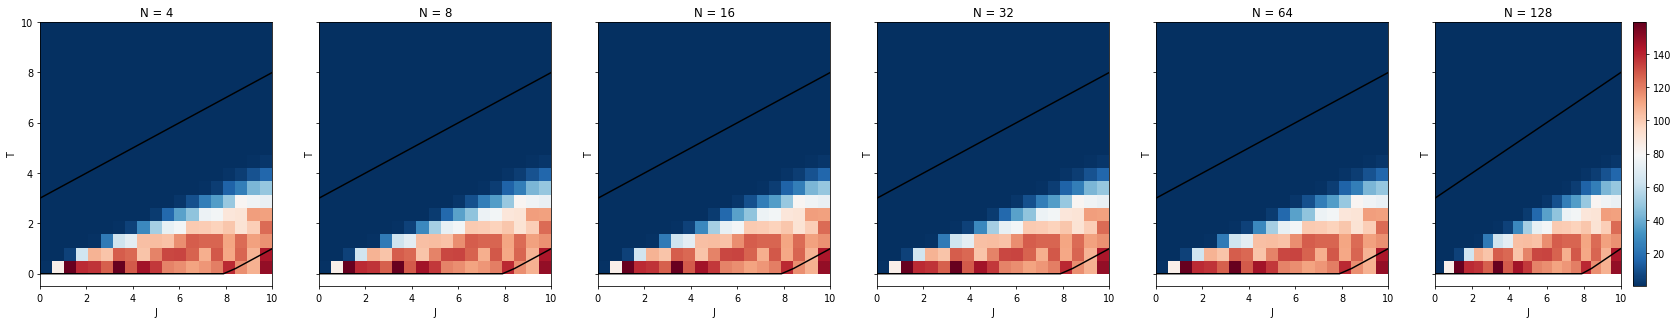

In [25]:
norm = colors.Normalize()

f, axes = plt.subplots(1,6, figsize = (6*5,5), sharey = 'row')

intersect_T_upper = 3 + 0.5*obs.Js
intersect_T_lower = np.maximum(0, -4 + 0.5*obs.Js)

Y = M2**2 / M4

for i, N, ax in zip(count(), obs.Ns, axes):
    ax.set(title = f'N = {N}', xlabel = 'J', ylabel = 'T')
    cs = ax.pcolormesh(obs.Js, obs.Ts, Y[i], cmap='RdBu_r', norm = norm)
    
    ax.plot(obs.Js, intersect_T_upper, 'k')
    ax.plot(obs.Js, intersect_T_lower, 'k')
    

f.colorbar(cs)

In [24]:
obs2 = get_data_structured(Path('/data/users/tch14/slurm_runs/96792'),
                 requested_observables = ['Ff', 'Fc', 'Mf_moments', 'time'],
                 structure_names = ('Js','Ts'),
                 structure_dims = (None, None),
                 )
#((6, 10, 10, 10, 5, 100), ('Ns', 'repeats', 'Us', 'Ts', 'moment', 'MCstep'))
"""
def fill_and_reshape_2(sparse, axis = 1, replace_shape = (20,28)):
    '''Takes something with a shape like (6, 542, 1000) and bulks it out to (6, 20, 28, 1000) 
    assuming that any missing values are at the end of the the flat version of spare'''
    
    new_shape = sparse.shape[:axis] + replace_shape + sparse.shape[axis+1:]
    linear_size = product(new_shape)
    print(f'object with shape {sparse.shape} -> {linear_size} -> {new_shape}')
    
    dense = np.full(shape = linear_size, fill_value = np.nan)
    dense[:product(sparse.shape)] = sparse.flatten()
    return dense.reshape(new_shape)
        
obs2.Ff = fill_and_reshape_2(obs2.Ff, axis = 1, replace_shape = (20,28))
obs2.Fc = fill_and_reshape_2(obs2.Fc, axis = 1, replace_shape = (20,28))
obs2.Mf_moments = fill_and_reshape_2(obs2.Mf_moments, axis = 1, replace_shape = (20,28))
"""

looking in /data/users/tch14/slurm_runs/96792
job ids range from 0 to 559
structure_names = ('Js', 'Ts')
structure_dims = (20, 28)
Expected number of jobs 560
Missing jobs: set()

Logger keys:  ['Js', 'Ns', 'Ts', 'parameters', 'MCMC_params', 'logs', 'desc'] 

MCMC_params:  {'state': '...', 'N_steps': 100000, 'N_burn_in': 10000, 'thin': 100, 'logger': <FKMC.montecarlo.Eigenspectrum_IPR_all object at 0x7f5b7c982710>, 'proposal': <function p_multi_site_uniform_reflect at 0x7f5bed4ad2f0>, 'accept_function': <function perturbation_accept at 0x7f5bed4ad620>, 'warnings': True} 

MCMC Steps: 100000 with thinning = 100 for 1000 recorded steps
Slicing this with MCMC_slice = slice(None, None, 1)

[(0, 'Js', 20), (1, 'Ts', 28)]
available observables = ['A', 'Fc', 'Ff', 'IPRs', 'Mf_moments', 'N_cumulants', 'N_sites', 'N_steps', 'Nc', 'Nf', 'accept_rates', 'classical_accept_rates', 'eigenval_bins', 'eigenvals', 'last_state', 'powers', 'proposal_rates', 'return_vals', 'start', 'state', 'time', 'updat

"\ndef fill_and_reshape_2(sparse, axis = 1, replace_shape = (20,28)):\n    '''Takes something with a shape like (6, 542, 1000) and bulks it out to (6, 20, 28, 1000) \n    assuming that any missing values are at the end of the the flat version of spare'''\n    \n    new_shape = sparse.shape[:axis] + replace_shape + sparse.shape[axis+1:]\n    linear_size = product(new_shape)\n    print(f'object with shape {sparse.shape} -> {linear_size} -> {new_shape}')\n    \n    dense = np.full(shape = linear_size, fill_value = np.nan)\n    dense[:product(sparse.shape)] = sparse.flatten()\n    return dense.reshape(new_shape)\n        \nobs2.Ff = fill_and_reshape_2(obs2.Ff, axis = 1, replace_shape = (20,28))\nobs2.Fc = fill_and_reshape_2(obs2.Fc, axis = 1, replace_shape = (20,28))\nobs2.Mf_moments = fill_and_reshape_2(obs2.Mf_moments, axis = 1, replace_shape = (20,28))\n"

In [30]:
def fill_and_reshape(sparse, obs):
    dense = np.full(shape = (6, len(obs.Js) * len(obs.Ts)), fill_value = np.nan)
    dense[:, :sparse.shape[1]] = sparse
    return dense.reshape(6, len(obs.Js), len(obs.Ts))

def T_upper(J): return 3 + 0.5*J
def T_lower(J): return max(0, -4 + 0.5*J)
obs2.T_grid = np.array([np.linspace(T_lower(J), T_upper(J), 28) for J in obs2.Js]) 
obs2.J_grid = np.broadcast_to(obs2.Js[:, None], shape = obs2.T_grid.shape)

#shapes(obs2.T_grid, obs2.J_grid)

## adding in the extra detail to the M2 plot

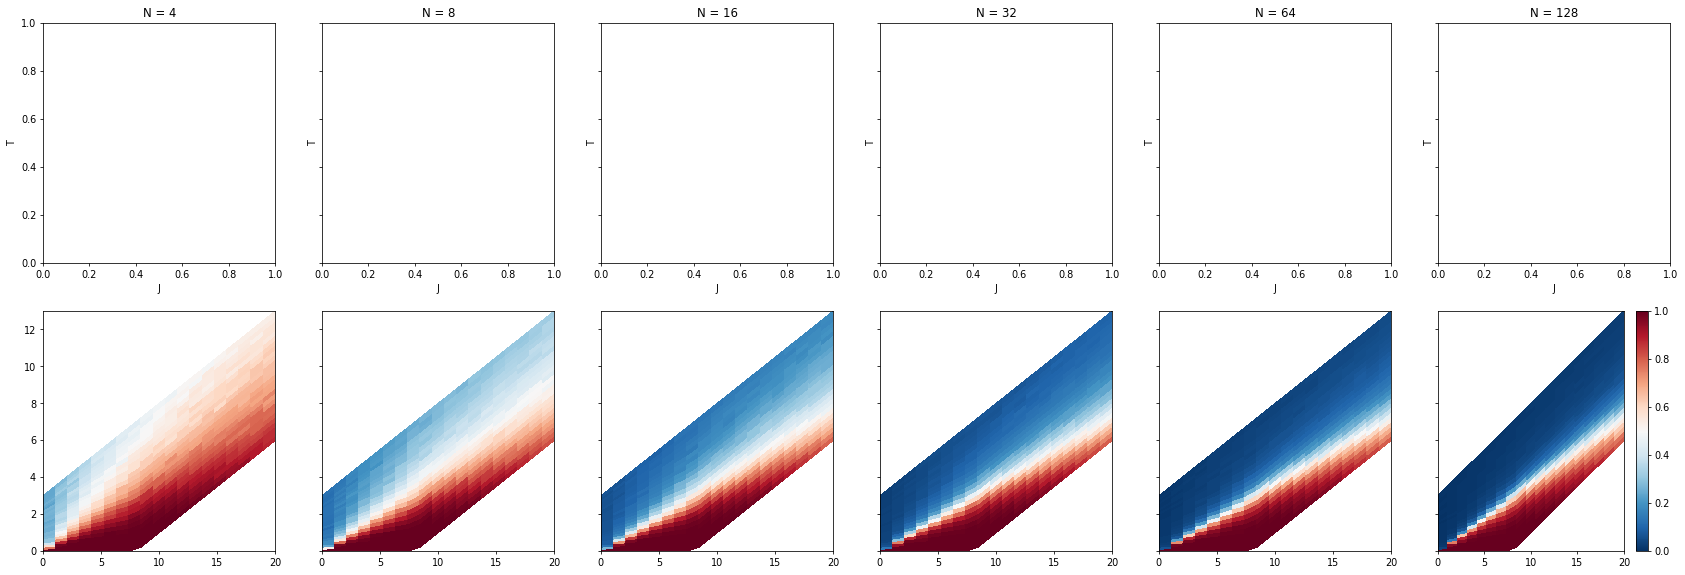

In [33]:
norm = colors.Normalize(vmin = 0, vmax = 1)

f, axes = plt.subplots(2,6, figsize = (6*5,10), sharey = 'row')

#intersect_T_upper = 3 + 0.5*obs.Js
#intersect_T_lower = np.maximum(0, -4 + 0.5*obs.Js)

for i, N, ax in zip(count(), obs2.Ns, axes.T):
    ax[0].set(title = f'N = {N}', xlabel = 'J', ylabel = 'T')
        
    #cs = ax[1].pcolormesh(obs.Js, obs.Ts, M2[i, ...].T, cmap='RdBu_r', norm = norm)
    cs = ax[1].pcolormesh(obs2.J_grid, obs2.T_grid, obs2.Mf_moments[i, :, :, 2, :].mean(axis = -1), cmap='RdBu_r', norm = norm)
    
    #ax[0].plot(obs.Js, intersect_T_upper, 'k')
    #ax[0].plot(obs.Js, intersect_T_lower, 'k')
    

f.colorbar(cs)

#save for plotting elsewhere
i = -1
data = dict(
    command = 'cs = ax[1].pcolormesh(obs2.J_grid, obs2.T_grid, obs2.Mf_moments[i, :, :, 2, :].mean(axis = -1), cmap="RdBu_r", norm = norm)',
    N = obs2.Ns[i],
    Y = obs2.Mf_moments[i, :, :, 2, :].mean(axis = -1),
    J_grid = obs2.J_grid,
    T_grid = obs2.T_grid,
)
f = '/home/tch14/workspace/fake_home/Dropbox/Apps/Overleaf/Short Paper/figs/phase_diagram_JT.npz'
np.savez(f, **data)

## Adding in the extra detail to the binder cumulant plot

[(20, 28), (6, 20, 20), (6, 20, 28)]


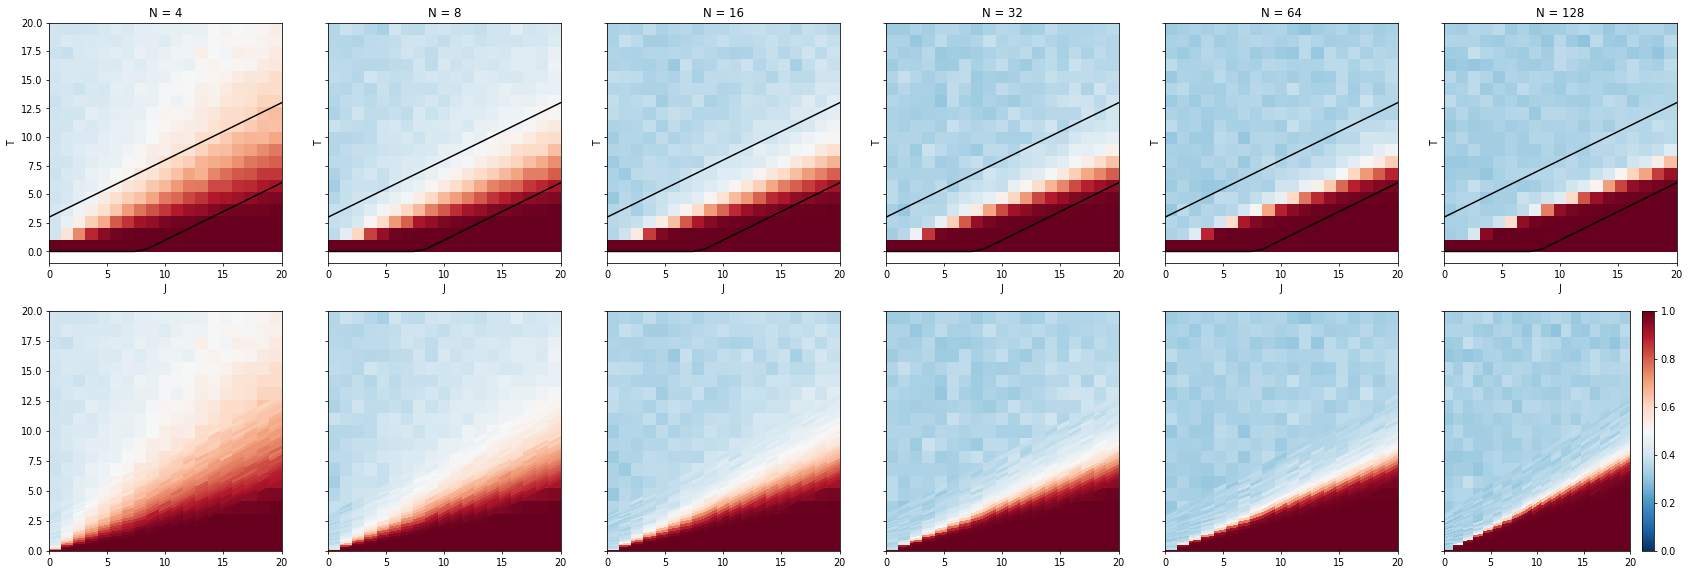

In [126]:
norm = colors.Normalize(vmin = 0, vmax = 1)

f, axes = plt.subplots(2,6, figsize = (6*5,10), sharey = 'row')

intersect_T_upper = 3 + 0.5*obs.Js
intersect_T_lower = np.maximum(0, -4 + 0.5*obs.Js)

B = M2**2 / M4
B2 = obs2.Mf_moments[:, :, :, 2, :].mean(axis = -1)**2 / obs2.Mf_moments[:, :, :, 4, :].mean(axis = -1)

shapes(obs2.T_grid, B, B2)

for i, N, ax in zip(count(), obs.Ns, axes.T):
    ax[0].set(title = f'N = {N}', xlabel = 'J', ylabel = 'T')
    cs = ax[0].pcolormesh(obs.Js, obs.Ts, B[i, ...].T, cmap='RdBu_r', norm = norm)
    
    cs = ax[1].pcolormesh(obs.Js, obs.Ts, B[i, ...].T, cmap='RdBu_r', norm = norm)
    cs = ax[1].pcolormesh(obs2.J_grid, obs2.T_grid, B2[i], cmap='RdBu_r', norm = norm)
    
    ax[0].plot(obs.Js, intersect_T_upper, 'k')
    ax[0].plot(obs.Js, intersect_T_lower, 'k')
    
    J_i = 5
    ax[0].plot()
    

f.colorbar(cs)

NameError: name 'B2' is not defined

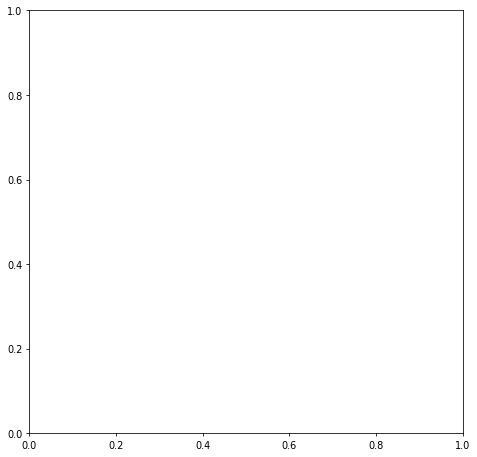

In [36]:
f, ax = plt.subplots(1, 1, figsize = (8, 8), sharex = 'all', gridspec_kw = dict(hspace=0))

for i, T in zip(count(), obs2.T_grid):
    ax.plot(T, B2[:, i, :].T)
    
    for j in range(5):
        f = B2[j, i, :] - B2[j+1, i, :]
        z = find_zero_crossings(f)
        T_intersection = interp_x_position(f, T, z)
        B_intersection = np.interp(T_intersection, T, B2[j, i, :])
        

        ax.plot([T_intersection,], [B_intersection,], 'o')

AttributeError: M2

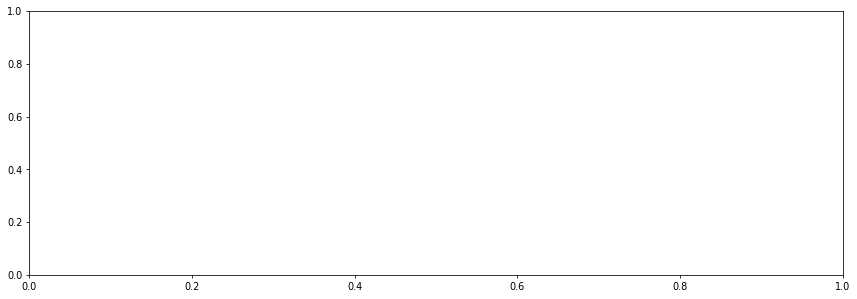

In [37]:
from FKMC.general import find_zero_crossings, interp_x_position
from reweighting import interp_multi, FS_multi_reweight

f, ax = plt.subplots(1, 1, figsize = (15, 5), sharex = 'all', gridspec_kw = dict(hspace=0))
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

i = 10
T = obs2.T_grid[i]


def FS_interp(Ts, Fs, Os, ax, m = 3, color = 'r'):
    fs_guess = None
    grid = np.arange(-(m//2), (m//2) + 1, 1) #[-1,0,1], [-2,-1,0,1,2] etc
    for i in range(len(Ts))[m//2:-(m//2)]:
        try:
            ix = i + grid 
            new_Ts = np.linspace((Ts[i-1]+Ts[i])/2,(Ts[i]+Ts[i+1])/2, 10)

            reweighted_O, fs = FS_multi_reweight(new_betas = 1/new_Ts, betas = 1/Ts[ix], Fs = Fs[ix], Os = Os[ix])

            ax.plot(new_Ts, reweighted_O, color = color)
        except RuntimeError:
            pass
        
for j in range(6): 
    ax.scatter(T, obs2.M2[j, i, :].T, color = color_cycle[j])
    
    Fs = obs2.Ff[j, :] + obs2.Fc[j, :]
    Os = obs2.Mf_moments[j, :, 2, :]
    shapes(T, Fs, Os)
    
    FS_interp(T, Fs, Os, ax, color = color_cycle[j])
    

for j in range(5):
    f = B2[j, i, :] - B2[j+1, i, :]
    z = find_zero_crossings(f)
    T_intersection = interp_x_position(f, T, z)
    B_intersection = np.interp(T_intersection, T, B2[j, i, :])

    ax.plot([T_intersection,], [B_intersection,], 'o')
    